In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the dataset / reading CSV file
df = pd.read_csv(r"C:\Users\Sai_iluru\OneDrive - UMBC\Desktop\UMBC\733\python notebooks\Baltimore911.csv",  low_memory=False)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [3]:
rows,columns = df.shape
print("rows: ", rows)
print("columns: ", columns)

rows:  292761
columns:  16


In [4]:
# Total number of call instances (rows)
total_rows = len(df)

# Total number of call features (columns)
total_columns = len(df.columns)

# Lists to store attribute information
attribute_names = []
attribute_types = []
attribute_min = []
attribute_max = []
attribute_mean = []
attribute_median = []
attribute_std_dev = []
unique_values_list = []
top_values_list = []
missing_percentage_list = []

# Iterate over each column
for column in df.columns:
    column_info = {}
    
    # Determine attribute type and gather statistics
    if df[column].dtype in ['int64', 'float64']:
        column_info['type'] = 'numeric'
        column_info['min'] = df[column].min()
        column_info['max'] = df[column].max()
        column_info['mean'] = df[column].mean()
        column_info['median'] = df[column].median()
        column_info['std_dev'] = df[column].std()
        unique_values = np.nan
        top_values = np.nan
    elif column in ['CrimeDate', 'CrimeTime']:
        column_info['type'] = 'Temporal(discrete)'
        unique_values = df[column].nunique()
        unique_values = df[column].nunique()
        top_values = dict(df[column].value_counts().nlargest(3))
    elif column in ['Location','Location 1', 'Longitude', 'Latitude']:
        column_info['type'] = 'Spatial(discrete)'
        unique_values = df[column].nunique()
        unique_values = df[column].nunique()
        top_values = dict(df[column].value_counts().nlargest(3))
    else:
        column_info['type'] = 'discrete'
        unique_values = df[column].nunique()
        top_values = dict(df[column].value_counts().nlargest(3))
    
    # Calculate missingness
    missing_percentage = df[column].isnull().mean() * 100
    
    # Store attribute information in lists
    attribute_names.append(column)
    attribute_types.append(column_info.get('type', 'NA'))
    attribute_min.append(column_info.get('min', 'NA'))
    attribute_max.append(column_info.get('max', 'NA'))
    attribute_mean.append(column_info.get('mean', 'NA'))
    attribute_median.append(column_info.get('median', 'NA'))
    attribute_std_dev.append(column_info.get('std_dev', 'NA'))
    unique_values_list.append(unique_values)
    top_values_list.append(top_values)
    missing_percentage_list.append(missing_percentage)

# Create a DataFrame from the gathered information
data = {
    'Attribute': attribute_names,
    'Type': attribute_types,
    'Min': attribute_min,
    'Max': attribute_max,
    'Mean': attribute_mean,
    'Median': attribute_median,
    'Std Dev': attribute_std_dev,
    'Unique Values': unique_values_list,
    'Top 3 Values': top_values_list,
    'Missingness (%)': missing_percentage_list
}

# Create the DataFrame
df_info = pd.DataFrame(data)

# Replace 'None' and 'NaN' with 'Not applicable'
df_info.replace({None: 'NA'}, inplace=True)
df_info = df_info.fillna('NA')
# Print the DataFrame
print("Total number of call instances (rows):", total_rows)
print("Total number of call features (columns):", total_columns)
print("\nDataFrame with Attribute Information:")
df_info


Total number of call instances (rows): 292761
Total number of call features (columns): 16

DataFrame with Attribute Information:


,Attribute,Type,Min,Max,Mean,Median,Std Dev,Unique Values,Top 3 Values,Missingness (%)
0,CrimeDate,Temporal(discrete),NA,NA,NA,NA,NA,2300.0,"{'04/27/2015': 421, '06/05/2016': 255, '12/20/...",0.000000
1,CrimeTime,Temporal(discrete),NA,NA,NA,NA,NA,1475.0,"{'18:00:00': 6772, '17:00:00': 6463, '12:00:00...",0.008881
2,CrimeCode,discrete,NA,NA,NA,NA,NA,81.0,"{'4E': 48061, '6D': 38977, '5A': 25351}",0.000000
3,Location,Spatial(discrete),NA,NA,NA,NA,NA,27064.0,"{'1500 RUSSELL ST': 847, '3500 BOSTON ST': 708...",0.456345
4,Description,discrete,NA,NA,NA,NA,NA,14.0,"{'LARCENY': 65508, 'COMMON ASSAULT': 48061, 'B...",0.000000
5,Inside/Outside,discrete,NA,NA,NA,NA,NA,4.0,"{'O': 128776, 'I': 124454, 'Outside': 5113}",11.531591
6,Weapon,discrete,NA,NA,NA,NA,NA,5.0,"{'FIREARM': 29036, 'OTHER': 17313, 'KNIFE': 10...",78.982173
7,Post,discrete,NA,NA,NA,NA,NA,133.0,"{'114': 5227, '913': 4977, '111': 4915}",0.811584
8,District,discrete,NA,NA,NA,NA,NA,10.0,"{'NORTHEAST': 44207, 'SOUTHEAST': 41816, 'CENT...",0.000000
9,Neighborhood,discrete,NA,NA,NA,NA,NA,278.0,"{'DOWNTOWN': 9312, 'FRANKFORD': 6922, 'BELAIR-...",3.587910


## OBSERVATIONS

- There are 12 discrete and 4 numereic attributes out of the 16 columns.

- It is also observed that there is an empty column called 'location1' in the data.

- There are various empty and NA valued cells in data which needs to be taken care off.

- Inside/outside column is not normalized properly as it used "I/Inside" to represent crime committed inside and "O/Outside" to represent crime committed outside.

- There is one more column called 'Total Incidents' which has only a single value '1'.

- 


## TASK 2
Temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence.

In [5]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292756,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492,NaN,ROW/TOWNHOUSE-OCC,NaN,1
292757,05/01/1977,0:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-76.626880,39.328817,NaN,ROW/TOWNHOUSE-OCC,NaN,1
292758,06/01/1975,0:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-76.691297,39.289582,NaN,OTHER - INSIDE,NaN,1
292759,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-76.635300,39.358898,NaN,NaN,NaN,1


In [6]:
#Creating a df with required columns CrimeDate, Total Incidents
df_task2 = df[['CrimeDate','Total Incidents']]
df_task2

,CrimeDate,Total Incidents
0,02/08/2020,1
1,02/08/2020,1
2,02/08/2020,1
3,02/08/2020,1
4,02/08/2020,1
...,...,...
292756,01/01/1978,1
292757,05/01/1977,1
292758,06/01/1975,1
292759,07/20/1969,1


In [7]:
def g(df):
    df.loc[:, 'Date'] = pd.to_datetime(df['CrimeDate'])
    df.loc[:, 'Year'] = df['Date'].dt.year
    df.loc[:, 'Month'] = df['Date'].dt.month
    df.loc[:, 'Day'] = df['Date'].dt.day
    df.loc[:, 'DayOfWeek'] = df['Date'].dt.day_name()
    return df

df_task2 = g(df_task2)
df_task2

C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\2542407009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Date'] = pd.to_datetime(df['CrimeDate'])
C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\2542407009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year'] = df['Date'].dt.year
C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\2542407009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,CrimeDate,Total Incidents,Date,Year,Month,Day,DayOfWeek
0,02/08/2020,1,2020-02-08,2020,2,8,Saturday
1,02/08/2020,1,2020-02-08,2020,2,8,Saturday
2,02/08/2020,1,2020-02-08,2020,2,8,Saturday
3,02/08/2020,1,2020-02-08,2020,2,8,Saturday
4,02/08/2020,1,2020-02-08,2020,2,8,Saturday
...,...,...,...,...,...,...,...
292756,01/01/1978,1,1978-01-01,1978,1,1,Sunday
292757,05/01/1977,1,1977-05-01,1977,5,1,Sunday
292758,06/01/1975,1,1975-06-01,1975,6,1,Sunday
292759,07/20/1969,1,1969-07-20,1969,7,20,Sunday


In [8]:
# Extract the year from each date
#df_task2['Year'] = df_task2['Date'].dt.year
df_task2.loc[:, 'Year'] = df_task2['Date'].dt.year
# Count the number of times each year appears in the DataFrame
year_counts = df_task2['Year'].value_counts()
year_counts = year_counts[:8]
year_counts

Year
2017    52163
2016    48774
2018    48436
2015    48192
2019    45998
2014    45307
2020     3809
2013       15
Name: count, dtype: int64

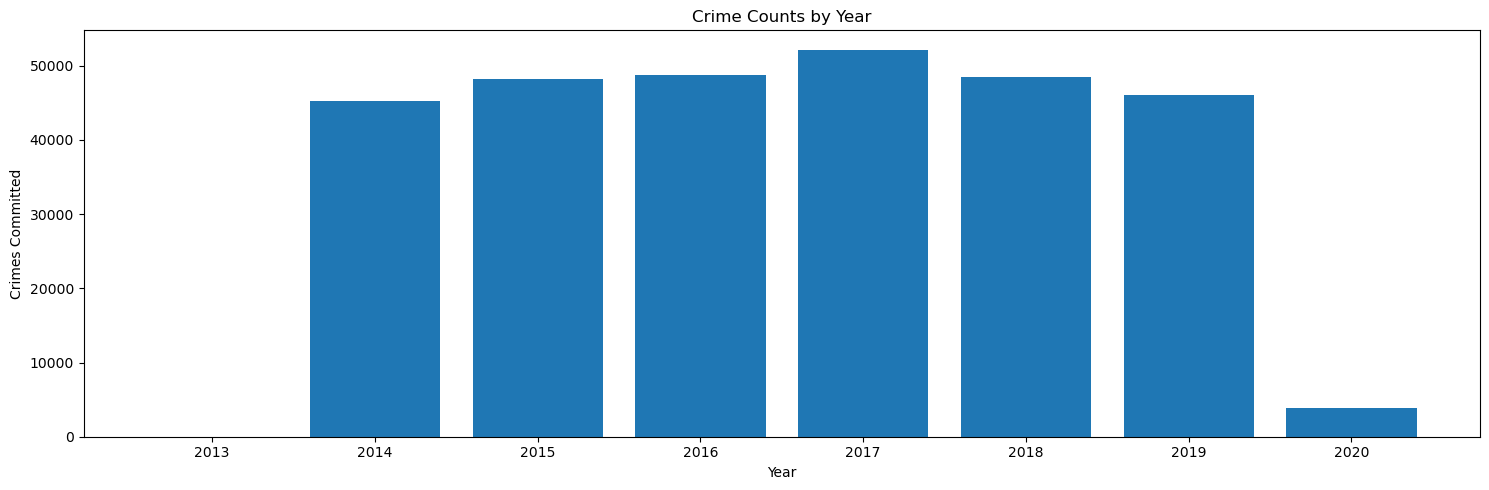

In [9]:
import matplotlib.pyplot as plt

# Create a new figure with custom size
fig, ax = plt.subplots(figsize=(15, 5))  # Adjust the width and height as needed

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Crimes Committed')

# Plot the year counts on the y-axis against the years on the x-axis
ax.bar(year_counts.index, year_counts.values)

# Set the title of the graph
ax.set_title('Crime Counts by Year')

# Show the graph
plt.tight_layout()
plt.show()


In [10]:
df_task2

,CrimeDate,Total Incidents,Date,Year,Month,Day,DayOfWeek
0,02/08/2020,1,2020-02-08,2020,2,8,Saturday
1,02/08/2020,1,2020-02-08,2020,2,8,Saturday
2,02/08/2020,1,2020-02-08,2020,2,8,Saturday
3,02/08/2020,1,2020-02-08,2020,2,8,Saturday
4,02/08/2020,1,2020-02-08,2020,2,8,Saturday
...,...,...,...,...,...,...,...
292756,01/01/1978,1,1978-01-01,1978,1,1,Sunday
292757,05/01/1977,1,1977-05-01,1977,5,1,Sunday
292758,06/01/1975,1,1975-06-01,1975,6,1,Sunday
292759,07/20/1969,1,1969-07-20,1969,7,20,Sunday


In [11]:
# Group the data by year and month
grouped_df = df_task2.groupby(['Year', 'Month'])

# Count the number of times each month appears in each year
month_counts = grouped_df.size().to_frame(name='Crime Count each month').reset_index()

# Print the results for the years 2023 and 2024
#task2_subtask2 = month_counts.loc[(month_counts['Year'] >= 2014) & (month_counts['Year'] <= 2020)].reset_index()
task2_subtask2 = month_counts.loc[(month_counts['Year'].isin([2016, 2018]))].reset_index(drop=True)
task2_subtask2

,Year,Month,Crime Count each month
0,2016,1,3380
1,2016,2,2874
2,2016,3,3620
3,2016,4,3896
4,2016,5,4268
5,2016,6,4434
6,2016,7,4111
7,2016,8,4297
8,2016,9,4491
9,2016,10,4821


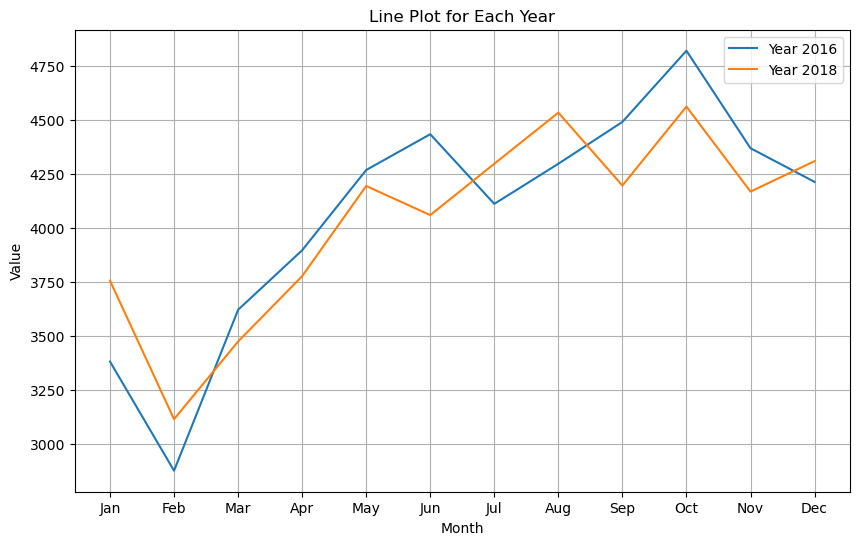

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming task2_subtask2 is a DataFrame containing the data

# Group by year and plot
plt.figure(figsize=(10, 6))

for year, group in task2_subtask2.groupby('Year'):
    plt.plot(group['Month'], group['Crime Count each month'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Line Plot for Each Year')
plt.legend(bbox_to_anchor=(1, 1))

# Set x-axis ticks to show grid at each month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1, 13), months)

plt.grid(True)  # Add grid for each month on x-axis
plt.show()


In [13]:
df_task2

,CrimeDate,Total Incidents,Date,Year,Month,Day,DayOfWeek
0,02/08/2020,1,2020-02-08,2020,2,8,Saturday
1,02/08/2020,1,2020-02-08,2020,2,8,Saturday
2,02/08/2020,1,2020-02-08,2020,2,8,Saturday
3,02/08/2020,1,2020-02-08,2020,2,8,Saturday
4,02/08/2020,1,2020-02-08,2020,2,8,Saturday
...,...,...,...,...,...,...,...
292756,01/01/1978,1,1978-01-01,1978,1,1,Sunday
292757,05/01/1977,1,1977-05-01,1977,5,1,Sunday
292758,06/01/1975,1,1975-06-01,1975,6,1,Sunday
292759,07/20/1969,1,1969-07-20,1969,7,20,Sunday


In [14]:
# Calculate the count of crimes for each DayOfWeek
per_day_count = df_task2['DayOfWeek'].value_counts()

print(per_day_count)


DayOfWeek
Friday       43661
Monday       43017
Tuesday      42325
Wednesday    42036
Thursday     41746
Saturday     40638
Sunday       39338
Name: count, dtype: int64


In [15]:

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the count of crimes for each DayOfWeek
per_day_count = df_task2['Total Incidents'].groupby(df_task2['DayOfWeek']).sum()

# Sort the counts based on the order of days
per_day_count = per_day_count[day_order]

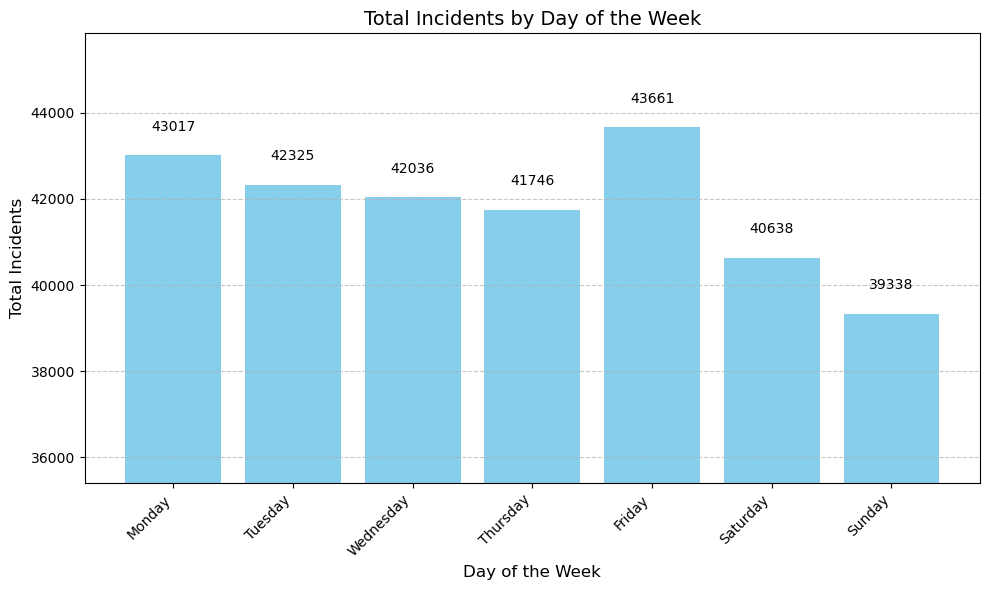

In [16]:
import matplotlib.pyplot as plt

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(day_order, per_day_count, color='skyblue')

# Set the x-axis and y-axis labels with larger font size
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Incidents', fontsize=12)

# Set the order of the x-axis labels and rotate them for better readability
plt.xticks(range(len(day_order)), day_order, rotation=45, ha='right')

# Annotate the bars with the crime counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, str(int(height)), ha='center', va='bottom', fontsize=10)

# Set the title of the graph with a larger font size
plt.title('Total Incidents by Day of the Week', fontsize=14)

# Set the y-axis limit to start at 39000
lowest_value = per_day_count.min()
plt.ylim(lowest_value * 0.9)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Task 3
Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods;

In [17]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [18]:
df_task3 = df[['Description','Total Incidents','District']]
df_task3

,Description,Total Incidents,District
0,BURGLARY,1,EASTERN
1,LARCENY,1,EASTERN
2,ROBBERY - RESIDENCE,1,EASTERN
3,ROBBERY - RESIDENCE,1,EASTERN
4,BURGLARY,1,EASTERN
...,...,...,...
292756,RAPE,1,NORTHEAST
292757,RAPE,1,NORTHERN
292758,RAPE,1,SOUTHWEST
292759,RAPE,1,NORTHERN


In [19]:
# Count the number of times each crime type appears in the DataFrame
crime_type_aggregation = df_task3['Description'].value_counts()
crime_type_aggregation

Description
LARCENY                 65508
COMMON ASSAULT          48061
BURGLARY                42237
LARCENY FROM AUTO       38977
AGG. ASSAULT            31706
AUTO THEFT              25832
ROBBERY - STREET        20779
ROBBERY - COMMERCIAL     5190
SHOOTING                 3869
ROBBERY - RESIDENCE      2984
ROBBERY - CARJACKING     2554
HOMICIDE                 1902
RAPE                     1891
ARSON                    1271
Name: count, dtype: int64

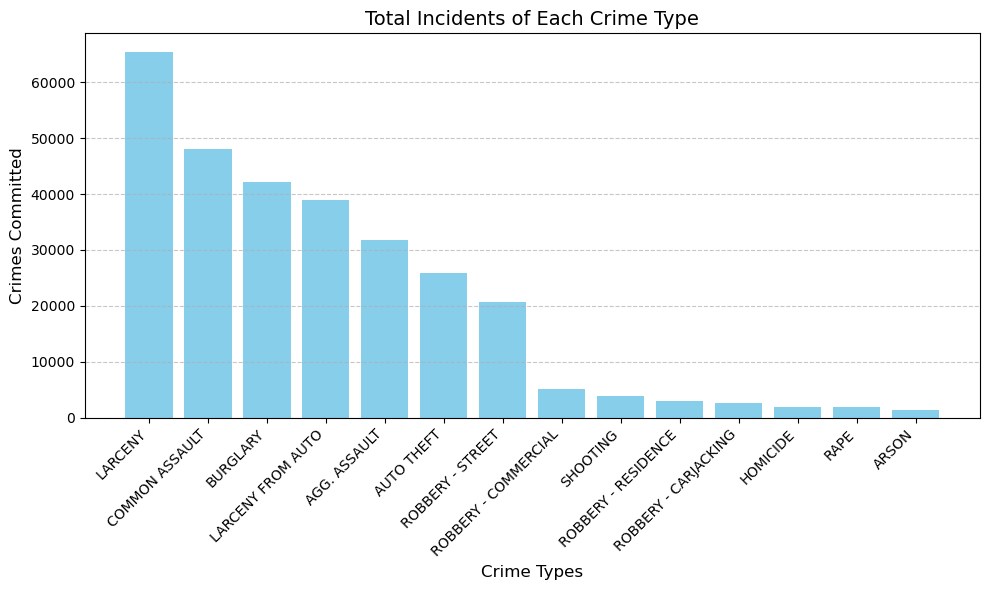

In [20]:
import matplotlib.pyplot as plt

# Assuming crime_type_aggregation is a pandas Series with crime types as the index and counts as the values

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the year counts on the y-axis against the years on the x-axis with custom colors
ax.bar(crime_type_aggregation.index, crime_type_aggregation.values, color='skyblue')

# Set the x-axis and y-axis labels with larger font size
ax.set_xlabel('Crime Types', fontsize=12)
ax.set_ylabel('Crimes Committed', fontsize=12)

# Set the title of the graph with a larger font size
ax.set_title('Total Incidents of Each Crime Type', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better visualization
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Task 4
Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.

In [21]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [22]:
crime_types = df['Description'].unique().tolist() 
print(crime_types)

['BURGLARY', 'LARCENY', 'ROBBERY - RESIDENCE', 'AUTO THEFT', 'ROBBERY - COMMERCIAL', 'ROBBERY - STREET', 'COMMON ASSAULT', 'SHOOTING', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'ROBBERY - CARJACKING', 'HOMICIDE', 'RAPE', 'ARSON']


In [23]:
value = int(input(f"Enter a number between 1 and {len(crime_types)}: "))
crime_type = crime_types[value - 1]
print(crime_type)

Enter a number between 1 and 14: 5
ROBBERY - COMMERCIAL


In [24]:
df_task4 = df[['CrimeDate', 'Description']]
df_task4

df_task4t = df[['CrimeDate', 'Description']]
df_task4t

,CrimeDate,Description
0,02/08/2020,BURGLARY
1,02/08/2020,LARCENY
2,02/08/2020,ROBBERY - RESIDENCE
3,02/08/2020,ROBBERY - RESIDENCE
4,02/08/2020,BURGLARY
...,...,...
292756,01/01/1978,RAPE
292757,05/01/1977,RAPE
292758,06/01/1975,RAPE
292759,07/20/1969,RAPE


In [25]:
def g(df):
    df.loc[:, 'Date'] = pd.to_datetime(df['CrimeDate'])
    df.loc[:, 'Year'] = df['Date'].dt.year
    df.loc[:, 'Month'] = df['Date'].dt.month
    df.loc[:, 'Day'] = df['Date'].dt.day
    df.loc[:, 'DayOfWeek'] = df['Date'].dt.day_name()
    return df

df_task4t = g(df_task4t)
df_task4t



C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\2026517970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Date'] = pd.to_datetime(df['CrimeDate'])
C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\2026517970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year'] = df['Date'].dt.year
C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\2026517970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,CrimeDate,Description,Date,Year,Month,Day,DayOfWeek
0,02/08/2020,BURGLARY,2020-02-08,2020,2,8,Saturday
1,02/08/2020,LARCENY,2020-02-08,2020,2,8,Saturday
2,02/08/2020,ROBBERY - RESIDENCE,2020-02-08,2020,2,8,Saturday
3,02/08/2020,ROBBERY - RESIDENCE,2020-02-08,2020,2,8,Saturday
4,02/08/2020,BURGLARY,2020-02-08,2020,2,8,Saturday
...,...,...,...,...,...,...,...
292756,01/01/1978,RAPE,1978-01-01,1978,1,1,Sunday
292757,05/01/1977,RAPE,1977-05-01,1977,5,1,Sunday
292758,06/01/1975,RAPE,1975-06-01,1975,6,1,Sunday
292759,07/20/1969,RAPE,1969-07-20,1969,7,20,Sunday


In [26]:
import pandas as pd

# Assuming df is your original DataFrame and 'column_name' is the column you want to filter on
# Replace 'column_name' with the actual column name, and 'desired_value' with the value you're looking for

# Create a boolean mask identifying rows where the specific column has the desired value
mask = df_task4['Description'] == crime_type

# Subset the DataFrame based on the boolean mask
df_task4 = df_task4[mask]

# Print or further use the filtered DataFrame
df_task4

,CrimeDate,Description
8,02/08/2020,ROBBERY - COMMERCIAL
9,02/08/2020,ROBBERY - COMMERCIAL
109,02/07/2020,ROBBERY - COMMERCIAL
125,02/07/2020,ROBBERY - COMMERCIAL
185,02/06/2020,ROBBERY - COMMERCIAL
...,...,...
292358,01/04/2014,ROBBERY - COMMERCIAL
292375,01/03/2014,ROBBERY - COMMERCIAL
292524,01/02/2014,ROBBERY - COMMERCIAL
292554,01/01/2014,ROBBERY - COMMERCIAL


In [27]:
def g(df):
    df.loc[:, 'Date'] = pd.to_datetime(df['CrimeDate'])
    df.loc[:, 'Year'] = df['Date'].dt.year
    df.loc[:, 'Month'] = df['Date'].dt.month
    df.loc[:, 'Day'] = df['Date'].dt.day
    df.loc[:, 'DayOfWeek'] = df['Date'].dt.day_name()
    return df

df_task4 = g(df_task4)
df_task4



,CrimeDate,Description,Date,Year,Month,Day,DayOfWeek
8,02/08/2020,ROBBERY - COMMERCIAL,2020-02-08,2020,2,8,Saturday
9,02/08/2020,ROBBERY - COMMERCIAL,2020-02-08,2020,2,8,Saturday
109,02/07/2020,ROBBERY - COMMERCIAL,2020-02-07,2020,2,7,Friday
125,02/07/2020,ROBBERY - COMMERCIAL,2020-02-07,2020,2,7,Friday
185,02/06/2020,ROBBERY - COMMERCIAL,2020-02-06,2020,2,6,Thursday
...,...,...,...,...,...,...,...
292358,01/04/2014,ROBBERY - COMMERCIAL,2014-01-04,2014,1,4,Saturday
292375,01/03/2014,ROBBERY - COMMERCIAL,2014-01-03,2014,1,3,Friday
292524,01/02/2014,ROBBERY - COMMERCIAL,2014-01-02,2014,1,2,Thursday
292554,01/01/2014,ROBBERY - COMMERCIAL,2014-01-01,2014,1,1,Wednesday


In [28]:
year_list = df_task4['Year'].unique().tolist()
print(year_list)

[2020, 2019, 2018, 2017, 2016, 2015, 2014]


In [29]:
df_task4.loc[:, 'Year'] = df_task4['Date'].dt.year
# Count the number of times each year appears in the DataFrame
year_counts = df_task4['Year'].value_counts()
year_counts

Year
2017    1078
2018     913
2015     883
2016     865
2019     756
2014     627
2020      68
Name: count, dtype: int64

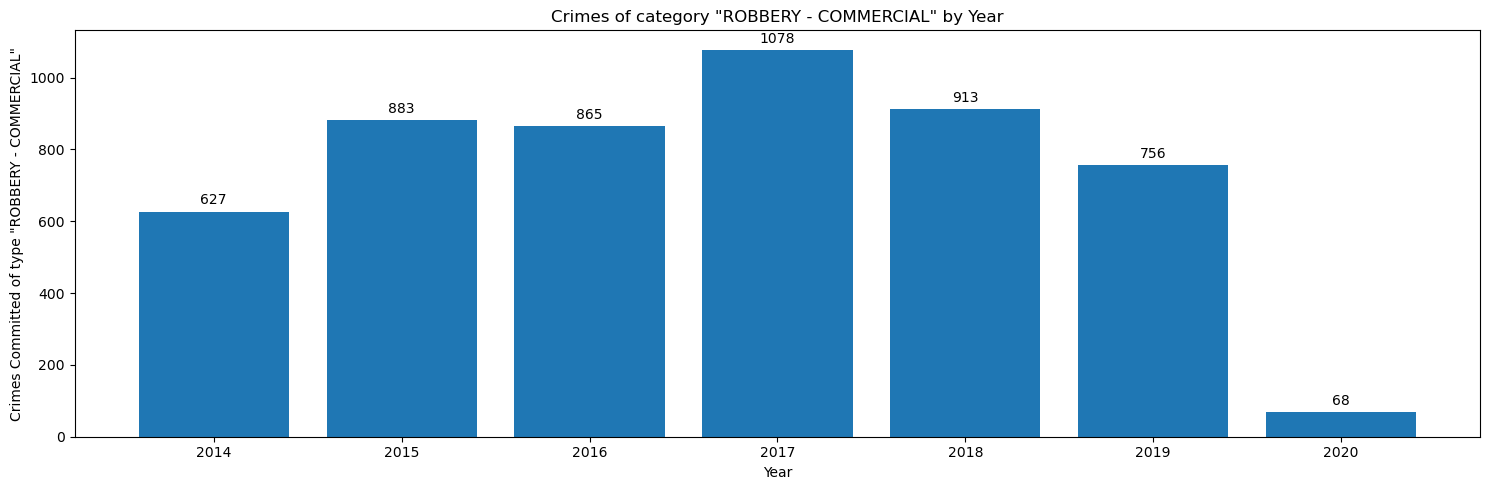

In [30]:
import matplotlib.pyplot as plt

# Create a new figure with custom size
fig, ax = plt.subplots(figsize=(15, 5))  # Adjust the width and height as needed

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel(f'Crimes Committed of type "{crime_type}"')

# Plot the year counts on the y-axis against the years on the x-axis
bars = ax.bar(year_counts.index, year_counts.values)

# Annotate the bars with their heights
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better positioning
                textcoords="offset points",
                ha='center', va='bottom')

# Set the title of the graph
ax.set_title(f'Crimes of category "{crime_type}" by Year')

# Show the graph
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
##  Year vs crime Aggregation
--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------

In [31]:
import pandas as pd


# Extract year from CrimeDate
df_task4['Year'] = pd.to_datetime(df_task4['CrimeDate']).dt.year

# Filter data for years above 2014
df_task4 = df_task4[df_task4['Year'] > 2014]

# Group by Year and Crime, and count occurrences
crime_counts = df_task4.groupby(['Year', 'Description']).size().unstack(fill_value=0)
crime_counts

Description,ROBBERY - COMMERCIAL
Year,
2015,883
2016,865
2017,1078
2018,913
2019,756
2020,68


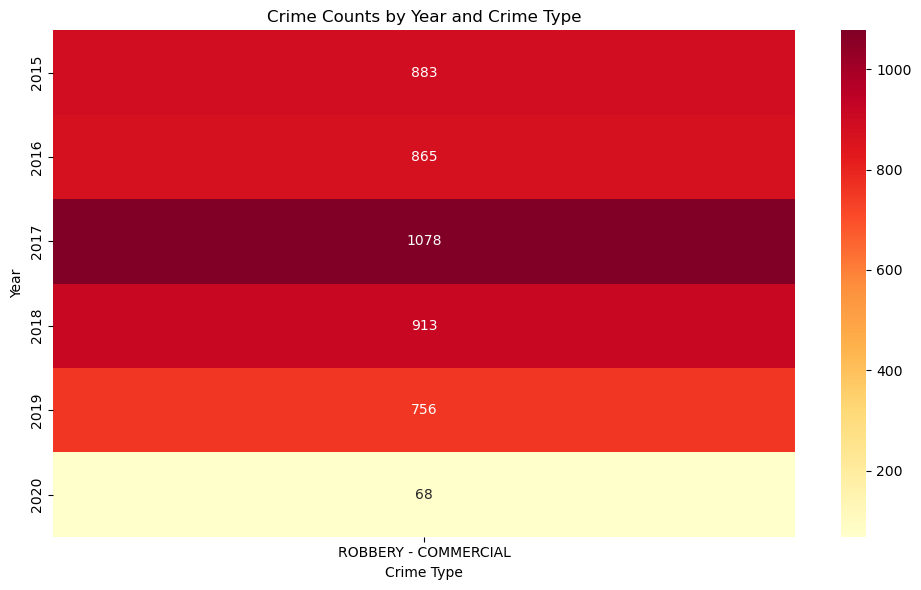

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crime_counts is your DataFrame with crime counts for each year
# Replace this with your actual DataFrame

# Sample data (replace with your actual data)
# crime_counts = ...

# Set the size of the heatmap plot
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(crime_counts, annot=True, fmt='d', cmap='YlOrRd')

# Set labels and title
plt.xlabel('Crime Type')
plt.ylabel('Year')
plt.title('Crime Counts by Year and Crime Type')

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
# monthly tracking

import pandas as pd

# Assuming df_task4 is your DataFrame
# Replace this with your actual DataFrame

# Sample data (replace with your actual data)
# df_task4 = ...

# Convert 'CrimeDate' to datetime
df_task4['CrimeDate'] = pd.to_datetime(df_task4['CrimeDate'])

# Extract year and month from 'CrimeDate'
df_task4['Year'] = df_task4['CrimeDate'].dt.year
df_task4['Month'] = df_task4['CrimeDate'].dt.month

# Group by Year and Month, and count occurrences
crime_counts_monthly = df_task4.groupby(['Year', 'Month']).size().unstack(fill_value=0)

print(crime_counts_monthly)

Month   1   2   3   4   5    6    7    8   9   10   11  12
Year                                                      
2015    85  37  50  50  88  102   99   79  68  59   88  78
2016    71  47  64  58  74   79   69   65  73  73   93  99
2017   107  88  89  64  72   71  104  101  90  92  104  96
2018    96  49  66  57  67   90   87   47  73  76  107  98
2019    94  52  66  61  69   59   57   61  53  75   63  46
2020    53  15   0   0   0    0    0    0   0   0    0   0


C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\3228597517.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4['CrimeDate'] = pd.to_datetime(df_task4['CrimeDate'])
C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\3228597517.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4['Year'] = df_task4['CrimeDate'].dt.year
C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\3228597517.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------


## Month vs crime aggregation

In [34]:
df_task4t

,CrimeDate,Description,Date,Year,Month,Day,DayOfWeek
0,02/08/2020,BURGLARY,2020-02-08,2020,2,8,Saturday
1,02/08/2020,LARCENY,2020-02-08,2020,2,8,Saturday
2,02/08/2020,ROBBERY - RESIDENCE,2020-02-08,2020,2,8,Saturday
3,02/08/2020,ROBBERY - RESIDENCE,2020-02-08,2020,2,8,Saturday
4,02/08/2020,BURGLARY,2020-02-08,2020,2,8,Saturday
...,...,...,...,...,...,...,...
292756,01/01/1978,RAPE,1978-01-01,1978,1,1,Sunday
292757,05/01/1977,RAPE,1977-05-01,1977,5,1,Sunday
292758,06/01/1975,RAPE,1975-06-01,1975,6,1,Sunday
292759,07/20/1969,RAPE,1969-07-20,1969,7,20,Sunday


C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\1681501487.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4t['Date'] = pd.to_datetime(df_task4t['Date'])
C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\1681501487.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4t['Month'] = df_task4t['Date'].dt.month


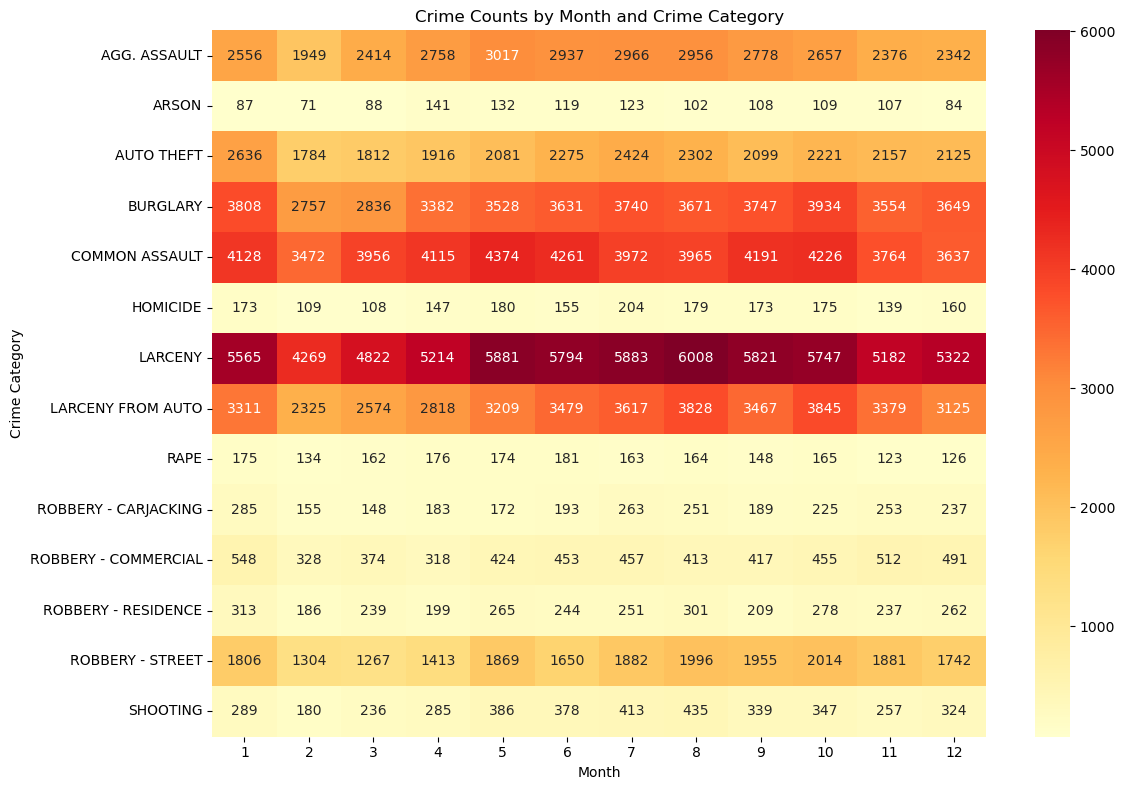

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'CrimeDate' and 'Description' columns
# Replace this with your actual DataFrame

# Sample data (replace with your actual data)
# df = ...

# Convert 'CrimeDate' to datetime
df_task4t['Date'] = pd.to_datetime(df_task4t['Date'])

# Extract month from 'CrimeDate'
df_task4t['Month'] = df_task4t['Date'].dt.month

# Group by 'Description' (crime category) and 'Month' and count occurrences
crime_counts_monthly = df_task4t.groupby(['Description', 'Month']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_counts_monthly, cmap='YlOrRd', annot=True, fmt='d', cbar=True)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Crime Category')
plt.title('Crime Counts by Month and Crime Category')

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------------
## Weekday vs crime Aggregation

C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\1506858644.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4t['DayOfWeek'] = pd.Categorical(df_task4t['DayOfWeek'], categories=day_order, ordered=True)


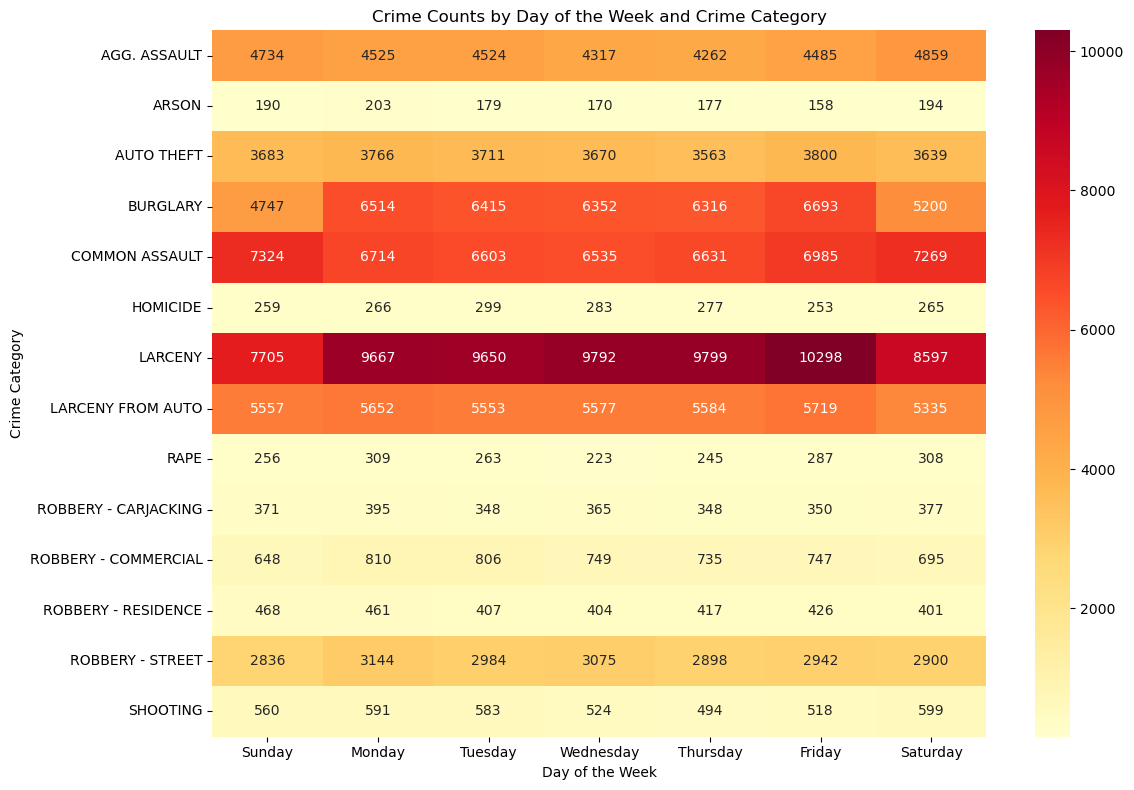

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_task4 is your DataFrame with 'CrimeDate' and 'Description' columns
# Replace this with your actual DataFrame

# Sample data (replace with your actual data)
# df_task4 = ...

# Ensure 'DayOfWeek' is in the correct order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_task4t['DayOfWeek'] = pd.Categorical(df_task4t['DayOfWeek'], categories=day_order, ordered=True)

# Group by 'Description' (crime category) and 'DayOfWeek' and count occurrences
crime_counts_daily = df_task4t.groupby(['Description', 'DayOfWeek']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_counts_daily, cmap='YlOrRd', annot=True, fmt='d', cbar=True)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Crime Category')
plt.title('Crime Counts by Day of the Week and Crime Category')

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Sai_iluru\AppData\Local\Temp\ipykernel_58048\1385897784.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4t['DayOfWeek'] = pd.Categorical(df_task4t['DayOfWeek'], categories=day_order, ordered=True)


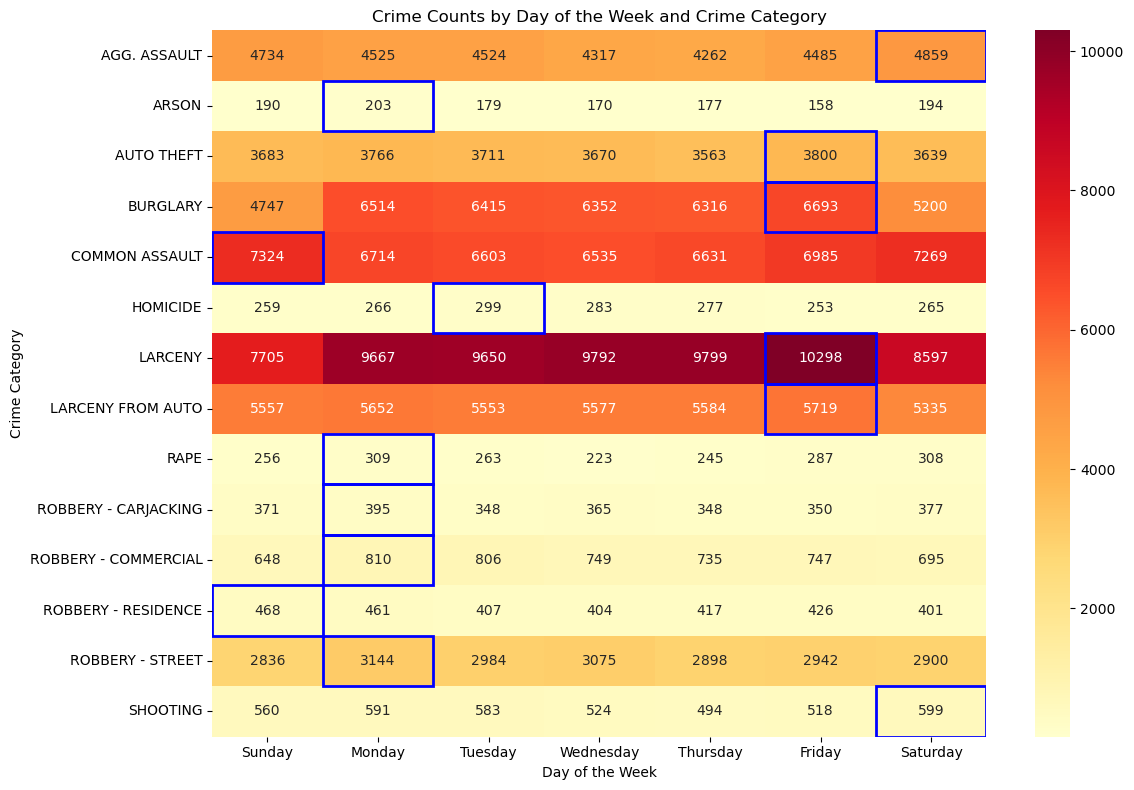

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_task4t is your DataFrame with 'CrimeDate' and 'Description' columns
# Replace this with your actual DataFrame

# Sample data (replace with your actual data)
# df_task4t = ...

# Ensure 'DayOfWeek' is in the correct order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_task4t['DayOfWeek'] = pd.Categorical(df_task4t['DayOfWeek'], categories=day_order, ordered=True)

# Group by 'Description' (crime category) and 'DayOfWeek' and count occurrences
crime_counts_daily = df_task4t.groupby(['Description', 'DayOfWeek']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(crime_counts_daily, cmap='YlOrRd', annot=True, fmt='d', cbar=True)

# Get the maximum value for each crime category
max_values = crime_counts_daily.max(axis=1)

# Highlight the maximum value in each row
for i, max_value in enumerate(max_values):
    max_index = crime_counts_daily.loc[crime_counts_daily.index[i], :].values.argmax()
    ax.add_patch(plt.Rectangle((max_index, i), 1, 1, fill=False, edgecolor='blue', lw=2))

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Crime Category')
plt.title('Crime Counts by Day of the Week and Crime Category')

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


##Task 5 in PPT done using tableau